##### 라이브러리 설치

In [1]:
%pip install azure-cognitiveservices-vision-customvision

Note: you may need to restart the kernel to use updated packages.


##### 라이브러리 Import

In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient 
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient 
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region 
from msrest.authentication import ApiKeyCredentials 
import os, time, uuid

##### 필수 기본 정보 설정

In [3]:
TRAINING_ENDPOINT = "https://7ai015customvision.cognitiveservices.azure.com/"
PREDICTION_ENDPOINT = "https://7ai015customvision-prediction.cognitiveservices.azure.com/"

TRAINING_API_KEY = "EpRluZj4J7BoOwanZenephSak7BCFlVgRar0LCuiYDOfXVADiZKDJQQJ99BGACfhMk5XJ3w3AAAJACOGKSe2"
PREDICTION_API_KEY="gzwp7pW29IK1q0x9ouxN15IDZEHBmnuXlONlX5nj9nGeieoI2ZtEJQQJ99BGACfhMk5XJ3w3AAAIACOG2ygV"

PREDICTION_RESOURCE_ID = "/subscriptions/b850d62a-25fe-4d3a-9697-ea40449528a9/resourceGroups/7ai015-ai-group/providers/Microsoft.CognitiveServices/accounts/7ai015customvision-Prediction"

##### Trainer, Predictor를 객체화

In [4]:
training_credentials = ApiKeyCredentials(in_headers={"Training-key": TRAINING_API_KEY})
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_API_KEY})

trainer = CustomVisionTrainingClient(endpoint=TRAINING_ENDPOINT, credentials=training_credentials)
predictor = CustomVisionPredictionClient(endpoint=PREDICTION_ENDPOINT, credentials=prediction_credentials)

##### 프로젝트 및 도메인 정보 확인

In [5]:
project_list = trainer.get_projects()

for project in project_list:
    print("PROJECT ID: {} | {} | DOMAIN ID: {}".format(project.id, project.name, project.settings.domain_id))

domain_list = trainer.get_domains()

for domain in domain_list:
    print("DOMAIN: {} | {} | {}".format(domain.id, domain.name, domain.type))

PROJECT ID: 8ade5537-5394-4151-8bbc-2ffc8af723b2 | 7ai015-kitchen | DOMAIN ID: a27d5ca5-bb19-49d8-a70a-fec086c47f5b
PROJECT ID: e42900d8-df2a-4a88-bc16-6569a79ed0e5 | 7ai015-customvision | DOMAIN ID: 2e37d7fb-3a54-486a-b4d6-cfc369af0018
DOMAIN: 2e37d7fb-3a54-486a-b4d6-cfc369af0018 | General [A2] | Classification
DOMAIN: a8e3c40f-fb4a-466f-832a-5e457ae4a344 | General [A1] | Classification
DOMAIN: ee85a74c-405e-4adc-bb47-ffa8ca0c9f31 | General | Classification
DOMAIN: c151d5b5-dd07-472a-acc8-15d29dea8518 | Food | Classification
DOMAIN: ca455789-012d-4b50-9fec-5bb63841c793 | Landmarks | Classification
DOMAIN: b30a91ae-e3c1-4f73-a81e-c270bff27c39 | Retail | Classification
DOMAIN: 45badf75-3591-4f26-a705-45678d3e9f5f | Adult | Classification
DOMAIN: a1db07ca-a19a-4830-bae8-e004a42dc863 | General (compact) [S1] | Classification
DOMAIN: 0732100f-1a38-4e49-a514-c9b44c697ab5 | General (compact) | Classification
DOMAIN: 8882951b-82cd-4c32-970b-d5f8cb8bf6d7 | Food (compact) | Classification
DOMAI

##### 프로젝트 만들기

In [6]:
project_name = "7ai015-kitchen"
project_description = "포크, 가위를 감지하는 모델"

project_id = None

# 기존 프로젝트 존재 여부 확인
for project in trainer.get_projects():

    if project.name == project_name:
        project_id = project.id
        print(project_id, "이미 있어!")
        break


# 원하는 도메일을 들고 옴.
for domain in trainer.get_domains():

    if domain.type == "ObjectDetection" and domain.name == "General (compact)":
        domain_id = domain.id
        print("DOMAIN: {} | {} | {}".format(domain.id, domain.name, domain.type))
        break


if domain_id and project_id is None:
    trainer.create_project(project_name, project_description, domain_id)
    print("프로젝트를 만들었어!")
else:
    project = trainer.get_project(project_id)
    print("프로젝트를 가져왔어!") 
    print(project.id, project.name)

8ade5537-5394-4151-8bbc-2ffc8af723b2 이미 있어!
DOMAIN: a27d5ca5-bb19-49d8-a70a-fec086c47f5b | General (compact) | ObjectDetection
프로젝트를 가져왔어!
8ade5537-5394-4151-8bbc-2ffc8af723b2 7ai015-kitchen


##### 태그 만들기

In [7]:
# 태그는 fork, scissors 두 개를 만들거에요.

# trainer.create_tag(project_id, "포크")

# 기존에 존재하는 태그를 모두 찾아냅니다.
# 포크 혹은 가위 태그가 존재하면, 그 태그 정보를 불러옵니다.
# 없으면, 포크 혹은 가위를 만들면 됩니다.

FORK_TAG_NAME = "포크"
SCISSORS_TAG_NAME = "가위"

fork_tag = None
scissors_tag = None

exist_tag_list = trainer.get_tags(project_id=project.id)

for tag in exist_tag_list:
    if tag.name == FORK_TAG_NAME:
        print("{} {} 들고 왔다!".format(tag.id, tag.name))
        fork_tag = tag
    if tag.name == SCISSORS_TAG_NAME:
        print("{} {} 들고 왔다!".format(tag.id, tag.name))
        scissors_tag = tag

if fork_tag is None:
    print("포크 만들었어!")
    fork_tag = trainer.create_tag(project_id, FORK_TAG_NAME)
    
if scissors_tag is None:
    print("가위 만들었어!")
    scissors_tag = trainer.create_tag(project_id, SCISSORS_TAG_NAME)

aee7494d-3dd3-4db4-a9a8-4b65d3e5780f 가위 들고 왔다!
e6194b2b-4224-4292-9992-b0445c1862e3 포크 들고 왔다!


##### Labeling 데이터

In [8]:
# [x, y, width, height]
fork_image_regions = {
    "fork_1": [ 0.145833328, 0.3509314, 0.5894608, 0.238562092 ],
    "fork_2": [ 0.294117659, 0.216944471, 0.534313738, 0.5980392 ],
    "fork_3": [ 0.09191177, 0.0682516545, 0.757352948, 0.6143791 ],
    "fork_4": [ 0.254901975, 0.185898721, 0.5232843, 0.594771266 ],
    "fork_5": [ 0.2365196, 0.128709182, 0.5845588, 0.71405226 ],
    "fork_6": [ 0.115196079, 0.133611143, 0.676470637, 0.6993464 ],
    "fork_7": [ 0.164215669, 0.31008172, 0.767156839, 0.410130739 ],
    "fork_8": [ 0.118872553, 0.318251669, 0.817401946, 0.225490168 ],
    "fork_9": [ 0.18259804, 0.2136765, 0.6335784, 0.643790841 ],
    "fork_10": [ 0.05269608, 0.282303959, 0.8088235, 0.452614367 ],
    "fork_11": [ 0.05759804, 0.0894935, 0.9007353, 0.3251634 ],
    "fork_12": [ 0.3345588, 0.07315363, 0.375, 0.9150327 ],
    "fork_13": [ 0.269607842, 0.194068655, 0.4093137, 0.6732026 ],
    "fork_14": [ 0.143382356, 0.218578458, 0.7977941, 0.295751631 ],
    "fork_15": [ 0.19240196, 0.0633497, 0.5710784, 0.8398692 ],
    "fork_16": [ 0.140931368, 0.480016381, 0.6838235, 0.240196079 ],
    "fork_17": [ 0.305147052, 0.2512582, 0.4791667, 0.5408496 ],
    "fork_18": [ 0.234068632, 0.445702642, 0.6127451, 0.344771236 ],
    "fork_19": [ 0.219362751, 0.141781077, 0.5919118, 0.6683006 ],
    "fork_20": [ 0.180147052, 0.239820287, 0.6887255, 0.235294119 ]
}

scissors_image_regions = {
    "scissors_1": [ 0.4007353, 0.194068655, 0.259803921, 0.6617647 ],
    "scissors_2": [ 0.426470578, 0.185898721, 0.172794119, 0.5539216 ],
    "scissors_3": [ 0.289215684, 0.259428144, 0.403186262, 0.421568632 ],
    "scissors_4": [ 0.343137264, 0.105833367, 0.332107842, 0.8055556 ],
    "scissors_5": [ 0.3125, 0.09766343, 0.435049027, 0.71405226 ],
    "scissors_6": [ 0.379901975, 0.24308826, 0.32107842, 0.5718954 ],
    "scissors_7": [ 0.341911763, 0.20714055, 0.3137255, 0.6356209 ],
    "scissors_8": [ 0.231617644, 0.08459154, 0.504901946, 0.8480392 ],
    "scissors_9": [ 0.170343131, 0.332957536, 0.767156839, 0.403594762 ],
    "scissors_10": [ 0.204656869, 0.120539248, 0.5245098, 0.743464053 ],
    "scissors_11": [ 0.05514706, 0.159754932, 0.799019635, 0.730392158 ],
    "scissors_12": [ 0.265931368, 0.169558853, 0.5061275, 0.606209159 ],
    "scissors_13": [ 0.241421565, 0.184264734, 0.448529422, 0.6830065 ],
    "scissors_14": [ 0.05759804, 0.05027781, 0.75, 0.882352948 ],
    "scissors_15": [ 0.191176474, 0.169558853, 0.6936275, 0.6748366 ],
    "scissors_16": [ 0.1004902, 0.279036, 0.6911765, 0.477124184 ],
    "scissors_17": [ 0.2720588, 0.131977156, 0.4987745, 0.6911765 ],
    "scissors_18": [ 0.180147052, 0.112369314, 0.6262255, 0.6666667 ],
    "scissors_19": [ 0.333333343, 0.0274019931, 0.443627447, 0.852941155 ],
    "scissors_20": [ 0.158088237, 0.04047389, 0.6691176, 0.843137264 ]
}

In [12]:
# 테스트 코드
with open('./fork/fork_20.jpg', "rb") as image:
    image_data = image.read()

# print(image_data)

with open('./scissors/scissors_1.jpg', "rb") as image:
    image_data2 = image.read()

# print(image_data2)

##### 이미지 업로드: Labeling위한 Region이 설정되어야 하고, 태그를 포함해서 이미지 업로드

In [27]:
image_list = list()

# 포크
for file_name in fork_image_regions.keys():
    file_path = "./fork/{}.jpg".format(file_name)
    left, top, width, height = fork_image_regions[file_name]
    
    # 태그와 위치 정보
    regions = [Region(tag_id=fork_tag.id, left=left, top=top, width=width, height=height)]

    # 이미지 정보
    with open(file_path, "rb") as image:
        image_data = image.read()

    entry = ImageFileCreateEntry(name=file_name, contents=image_data, regions=regions)
    image_list.append(entry)


# 가위
for file_name in scissors_image_regions.keys():
    file_path = "./scissors/{}.jpg".format(file_name)
    left, top, width, height = scissors_image_regions[file_name]

    # 태그와 위치 정보
    regions = [Region(tag_id=scissors_tag.id, left=left, top=top, width=width, height=height)]

    # 이미지 정보
    with open(file_path, "rb") as image:
        image_data = image.read()

    entry = ImageFileCreateEntry(name=file_name, contents=image_data, regions=regions)
    image_list.append(entry)


len(image_list)

batch = ImageFileCreateBatch(images=image_list)

result = trainer.create_images_from_files(project_id=project.id, batch=batch)

if result.is_batch_successful:
    print("업로드 성공!")

else:
    for image in result.images:
        print("{} : {}".format(image.source_url, image.status))

# print(result)

scissors_19 : OKDuplicate
scissors_6 : OKDuplicate
scissors_9 : OKDuplicate
scissors_10 : OKDuplicate
fork_20 : OKDuplicate
scissors_18 : OKDuplicate
scissors_14 : OKDuplicate
fork_18 : OKDuplicate
scissors_1 : OKDuplicate
fork_16 : OKDuplicate
scissors_20 : OKDuplicate
scissors_16 : OKDuplicate
scissors_13 : OKDuplicate
scissors_11 : OKDuplicate
fork_14 : OKDuplicate
scissors_3 : OKDuplicate
fork_13 : OKDuplicate
fork_15 : OKDuplicate
fork_9 : OKDuplicate
fork_6 : OKDuplicate
scissors_17 : OKDuplicate
fork_17 : OKDuplicate
fork_12 : OKDuplicate
fork_7 : OKDuplicate
fork_2 : OKDuplicate
scissors_4 : OKDuplicate
fork_11 : OKDuplicate
fork_5 : OKDuplicate
scissors_5 : OKDuplicate
fork_4 : OKDuplicate
scissors_15 : OKDuplicate
scissors_12 : OKDuplicate
scissors_8 : OKDuplicate
fork_3 : OKDuplicate
scissors_7 : OKDuplicate
scissors_2 : OKDuplicate
fork_19 : OKDuplicate
fork_10 : OKDuplicate
fork_8 : OKDuplicate
fork_1 : OKDuplicate


##### 트레이닝

In [25]:
import time

exist_iteration_list = trainer.get_iterations(project_id=project.id)

iteration = None

try:
    iteration = trainer.train_project(project_id=project.id)
except:
    iteration = exist_iteration_list[0]

while iteration.status == "Training":
    print("{} : {}".format(iteration.name, iteration.status))
    iteration = trainer.get_iteration(project_id=project.id, iteration_id=iteration.id)
    time.sleep(5)

print(iteration.id, iteration.name, iteration.status)

5f7a849a-e77c-4d66-858d-02531e013d20 Iteration 1 Completed


##### 배포

In [28]:
publish_name = "7ai015-kitchen-v1"

try:
    trainer.publish_iteration(project_id=project.id, iteration_id=iteration.id, publish_name=publish_name, prediction_id=PREDICTION_RESOURCE_ID)
except Exception as e:
    print(e)

Iteration is already published as: 7ai015-kitchen-v1


##### 예측

가위 0.8883729
390.07027200000005 138.9673398 675.3939839999999 552.4893614
가위 0.67482
612.287872 71.32731038 667.7108479999999 473.87316230000005


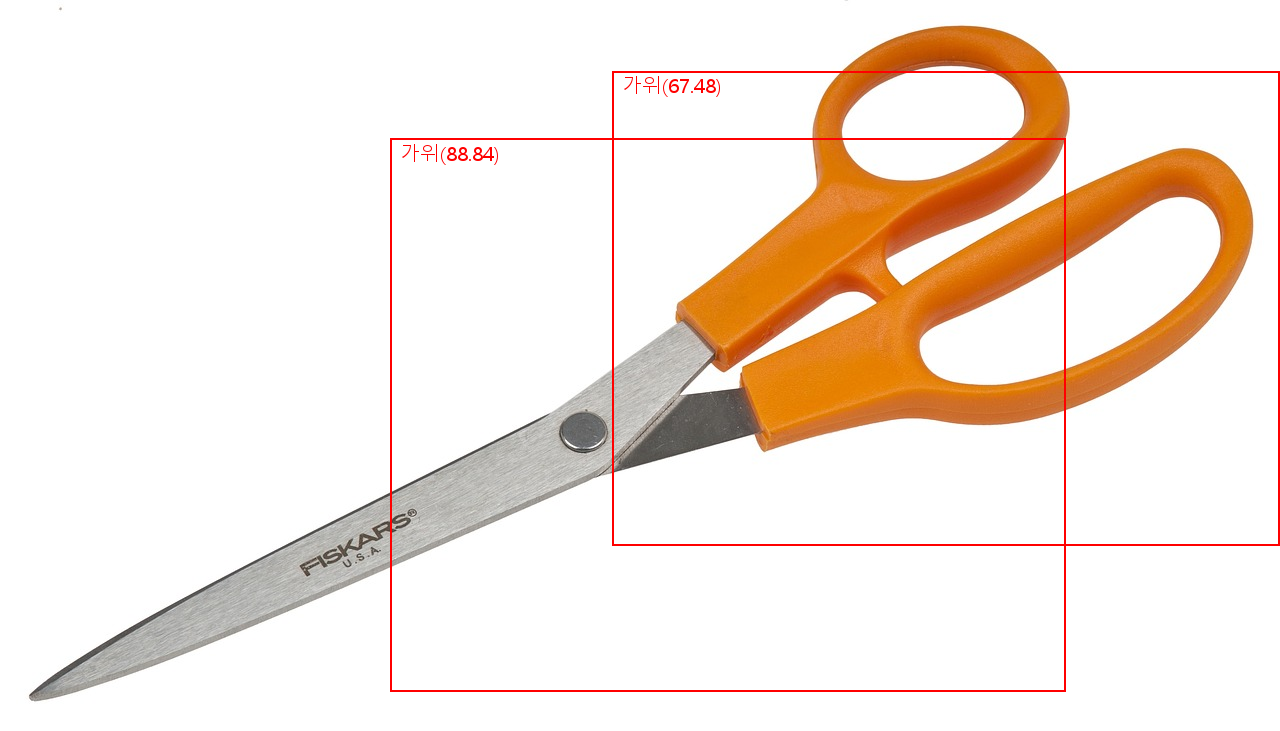

In [37]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import platform

IMAGE_URL = "https://cdn.pixabay.com/photo/2017/04/04/17/16/scissors-2202215_1280.jpg"

def get_font():
    # OS 별로 적절한 폰트 객체 반환 (한글 지원)
    font_size = 20

    try:
        if platform.system() == "Windows":
            # 윈도우용 한글 폰트
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin": # macOS
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else: # Linux
            return ImageFont.load_default(size=font_size)
        
    except IOError:
        return ImageFont.load_defaultI(size=font_size)


image_response = requests.get(IMAGE_URL)
image_data = image_response.content
image = Image.open(BytesIO(image_data))
draw = ImageDraw.Draw(image, 'RGBA')
font = get_font()

image_width, image_height = image.size

response = predictor.detect_image(project_id=project.id, published_name=publish_name, image_data=image_data)

# response = predictor.detect_image_url(project_id=project.id, published_name=publish_name, url=IMAGE_URL)

prediction_list = response.predictions

for prediction in prediction_list:
    tag_name = prediction.tag_name
    probability = prediction.probability
    bounding_box = prediction.bounding_box

    left = bounding_box.left * image_width
    top = bounding_box.top * image_height
    width = bounding_box.width * image_width
    height = bounding_box.height * image_height

    if probability > 0.5:
        print(tag_name, probability)
        print(left, top, width, height)
        draw.rectangle([(left, top), (left + width, top + height)], outline="red", width=2)
        draw.text((left + 10, top), "{}({:.2f})".format(tag_name, probability * 100), font=font, fill="red")

image